# Logistic regression

## scratch code

### data loading

In [1]:
from numpy import *

In [2]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

### define sigmoid func.

In [3]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

<img src = "sigmoid func.jpg" width=200 height=100>

<img src = "sigmoid func_plot.jpg" width="500" height="300">

In [4]:
# 위에 설명한 sigmoid 함수의 input은 z 이며,
    #z는 다음과 같음
    
    # z = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + ··· + w_n * x_n
    #벡터식으로 표현하면
        # z = w.T * x 인데
        # x가 입력데이터이고, z를 표현하는 가장 좋은(최대화된, 최적화된) w 를 찾는 것

In [5]:
#한국말로 해보면
    #함수값이 최대지점 되는 곳을 찾으려 하는 것
        #ppt에 있는 -> error func.에 대한 theta의 미분값이 0인지점(최소인 지점)을 찾는것과는 반대 논리

In [6]:
#여기서 f(x,y)괄호 안의 각각 미분식은
    #"기울기가 미분식만큼 x방향으로"
    #"기울기가 미분식만큼 y방향으로" 
        #이동하는 것을 의미

<img src = "gradient ascent func 1.jpg">

In [7]:
# w' = w + α * ▽w * f(w)  # plus면 ascent, minus면 descent

In [8]:
#크아아....

### gradient Ascent - batch

In [9]:
# h, error, for loop의 차이를 잘 볼 것

In [10]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             # numpy mat으로 변환 # x,y좌표가 들어올 자리
    labelMat = mat(classLabels).transpose() # numpy mat으로 변환 # 라벨이 들어올 자리 #row벡터로 불러왔기 때문에 transpose
    m,n = shape(dataMatrix)
    
    alpha = 0.001                       # Learning rate !!!!!!!!!!!
    maxCycles = 500                     # 반복횟수
    weights = ones((n,1))
    
    for k in range(maxCycles):              
        h = sigmoid(dataMatrix*weights)     #matrix 여서 연산 많이 필요 + 반복문 !
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error 
        
    return weights

### gradient Ascent - stocastic - (하나씩 뽑아서 접근)

In [11]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h                     # matrix전체를 사용하지 않고 i번째 요소를 뽑아서 사용 #한번에 하나의 사례만을 사용하여 가중치를 갱신
        weights = weights + alpha * error * dataMatrix[i]
    return weights

<img src = "gradient ascent plot 1.jpg" width="500" height="300">

### gradient Ascent - stocastic - (랜덤하게 하나씩 뽑아서 접근 + alpha감소)

In [12]:
#수렴하는 포인트만 빨리 찾으면 되니까!

In [13]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001                                  # alpha도 랜덤하게 변경, (감소)
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h                          # i 번째 요소가 아닌 랜덤하게 추출된 요소를 사용
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

<img src = "gradient ascent plot 2.jpg" width="500" height="300">

## Scikit-Learn

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [9]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [26]:
iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

reg = LogisticRegression() #parameter를 잘 찾아보기
reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

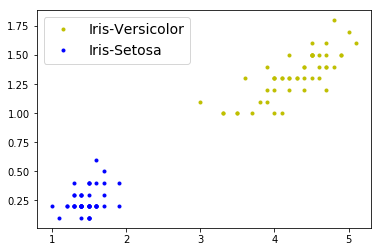

In [27]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")

plt.legend(loc="upper left", fontsize=14)

plt.show()

In [ ]:
#아래는 비슷한 분류인데, 참고용

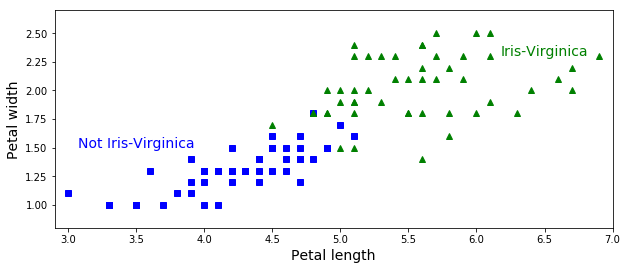

In [17]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Itis-Virginica, else 0

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()


In [18]:
log_reg = LogisticRegression()
log_reg_withC = LogisticRegression(C = 10**10)
log_reg.fit(X, y)
log_reg_withC.fit(X,y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

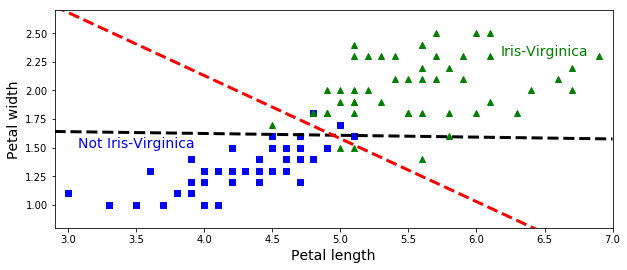

In [19]:
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
boundary_withC = -(log_reg_withC.coef_[0][0] * left_right + log_reg_withC.intercept_[0]) / log_reg_withC.coef_[0][1]


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.plot(left_right, boundary, "k--", linewidth = 3)
plt.plot(left_right, boundary_withC, "r--", linewidth = 3)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()